# FIFA FEMALE WORLDCUP ANALYSIS

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fifa = pd.read_excel('Womens_World_Cup.xlsx')
fifa

,id,squad,year,players,players_on_field,players_on_reserve,age,possesion,matches_played,starts,...,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,Argentina,2019,18,11,7,26.8,34.7,3,33,...,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,Australia,2019,18,11,7,25.4,61.3,4,44,...,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77
2,3,Brazil,2019,18,11,7,29.7,51.5,4,44,...,5,2,3,7.0,0.0,1.62,0.69,2.31,1.15,1.85
3,4,Cameroon,2019,20,11,9,27.7,36.0,4,44,...,3,0,0,6.0,0.0,0.75,0.75,1.50,0.75,1.50
4,5,Canada,2019,16,11,5,27.0,63.0,4,44,...,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,132,New Zealand,1991,15,11,4,25.5,NaN,3,33,...,1,0,0,NaN,NaN,0.37,0.37,0.75,0.37,0.75
132,133,Nigeria,1991,17,11,6,18.2,NaN,3,33,...,0,0,0,NaN,NaN,0.00,0.00,0.00,0.00,0.00
133,134,Norway,1991,15,11,4,24.1,NaN,6,66,...,12,1,1,NaN,NaN,2.34,1.08,3.42,2.16,3.24
134,135,Sweden,1991,18,11,7,25.4,NaN,6,66,...,16,1,1,NaN,NaN,3.19,2.06,5.25,3.00,5.06


In [3]:
fifa.columns

Index(['id', 'squad', 'year', 'players', 'players_on_field',
       'players_on_reserve', 'age', 'possesion', 'matches_played', 'starts',
       'min_playing_time', 'minutes_played_90s', 'goals', 'assists',
       'non_penalty_goals', 'penalty_kicks_made', 'penalty_kicks_attempted',
       'yellow_cards', 'red_cards', 'goals_per_90', 'assists_per_90',
       'goals_plus_assists_per_90', 'goals_minus_penalty_kicks_per_90',
       'goals_plus_assists_minus_penalty_kicks_per_90'],
      dtype='object')

In [10]:
fifa.describe()

,id,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,...,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
count,136.000000,136.000000,136.000000,136.000000,96.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,62.000000,62.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,68.500000,2007.117647,17.330882,25.274265,49.252083,4.176471,45.941176,378.147059,4.200735,6.566176,...,6.161765,0.404412,0.463235,2.483871,0.080645,1.375735,0.651324,2.027574,1.294265,1.946397
std,39.403892,9.159540,1.712936,1.962462,6.584783,1.298902,14.287920,122.916565,1.361780,5.764132,...,5.528674,0.754038,0.859872,2.434331,0.274512,0.923320,0.633787,1.405935,0.898872,1.365997
min,1.000000,1991.000000,13.000000,18.200000,30.000000,3.000000,33.000000,240.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.750000,1999.000000,16.000000,24.275000,46.275000,3.000000,33.000000,270.000000,3.000000,2.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.670000,0.000000,1.000000,0.600000,0.787500
50%,68.500000,2007.000000,17.000000,25.300000,49.400000,4.000000,44.000000,360.000000,4.000000,5.000000,...,4.500000,0.000000,0.000000,2.000000,0.000000,1.250000,0.500000,1.750000,1.075000,1.725000
75%,102.250000,2015.000000,18.000000,26.800000,53.350000,5.000000,55.000000,480.000000,5.300000,10.000000,...,9.000000,1.000000,1.000000,4.000000,0.000000,1.947500,1.000000,3.000000,1.800000,3.000000
max,136.000000,2019.000000,23.000000,29.700000,63.000000,7.000000,77.000000,690.000000,7.700000,25.000000,...,25.000000,4.000000,4.000000,8.000000,1.000000,4.690000,2.430000,6.750000,4.500000,6.560000


# Data cleaning

How many rows and columns are present in our initial dataset

In [5]:
fifa.shape

(136, 22)

The datatype of the columns and non null values of the dataset.

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id                                             136 non-null    int64  
 1   squad                                          136 non-null    object 
 2   year                                           136 non-null    int64  
 3   players                                        136 non-null    int64  
 4   age                                            136 non-null    float64
 5   possesion                                      96 non-null     float64
 6   matches_played                                 136 non-null    int64  
 7   starts                                         136 non-null    int64  
 8   min_playing_time                               136 non-null    int64  
 9   minutes_played_90s                             136 non

In [7]:
columns_contains_null = [col for col in fifa.columns if fifa[col].isnull().any()]
print(f' columns contain\'null\' values : \ n\ {columns_contains_null}')

 columns contain'null' values : \ n\ ['possesion', 'yellow_cards', 'red_cards']


Yellow_cards and red_cards have 62 non null rows 
Possession has 96 non null rows

In [8]:
# Fill null values for possession, yellow_cards, red_cards with 0
fifa.fillna(0, inplace=True)

In [9]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id                                             136 non-null    int64  
 1   squad                                          136 non-null    object 
 2   year                                           136 non-null    int64  
 3   players                                        136 non-null    int64  
 4   age                                            136 non-null    float64
 5   possesion                                      136 non-null    float64
 6   matches_played                                 136 non-null    int64  
 7   starts                                         136 non-null    int64  
 8   min_playing_time                               136 non-null    int64  
 9   minutes_played_90s                             136 non

In [10]:
# Save the updated dataframe to a new CSV file
fifa.to_csv('fifa.csv', index=False)

# EDA

Total number of different countries involved in the Female fifa worldcup

In [278]:
num_squads = len(fifa['squad'].unique())
print('Number of distinct Countries:', num_squads)

Number of distinct Countries: 36


Total number of different Years in the Female fifa worldcup

In [280]:
num_years = len(fifa['year'].unique())
print('Number of distinct Years:', num_years)

Number of distinct Years: 8


FIFA Female Worldcup Performance by Year

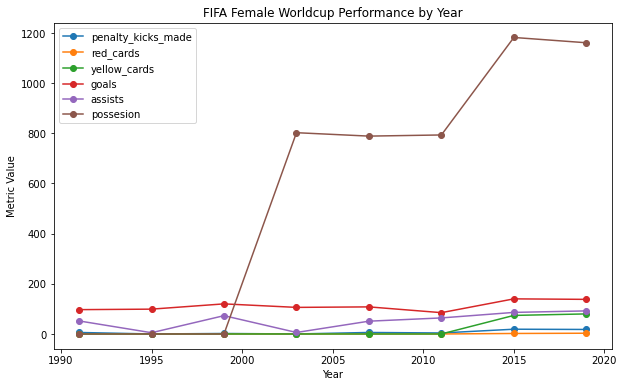

In [219]:
# Group the data by year and calculate the mean possession, matches played, starts, and minutes played
yearly_stats = fifa.groupby('year').sum()[['penalty_kicks_made','red_cards','yellow_cards','goals', 'assists','possesion']]

# Create a line plot for each performance metric
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(yearly_stats.index, yearly_stats['penalty_kicks_made'], label='penalty_kicks_made', marker='o')
ax.plot(yearly_stats.index, yearly_stats['red_cards'], label='red_cards', marker='o')
ax.plot(yearly_stats.index, yearly_stats['yellow_cards'], label='yellow_cards', marker='o')
ax.plot(yearly_stats.index, yearly_stats['goals'], label='goals', marker='o')
ax.plot(yearly_stats.index, yearly_stats['assists'], label='assists', marker='o')
ax.plot(yearly_stats.index, yearly_stats['possesion'], label='possesion', marker='o')

# Set the title and axis labels
ax.set_title('FIFA Female Worldcup Performance by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Metric Value')

# Add a legend and show the plot
ax.legend()
plt.show()


The resulting plot shows how each performance metric has changed over time for all the countries in the dataset. This can help thedetermine the trends in the FIFA Female Worldcup.

# Analysis Based on Squads

1. The top 10 countries for each metric ( Goals, Assists, Possession, Age)

In [144]:
# calculate the sum of assists, possession, goals, and the mean age by squad
top_10_squads_by_assists = fifa.groupby('squad')['assists'].sum().sort_values(ascending=False).head(10)
top_10_squads_by_possesion  = fifa.groupby('squad')['possesion'].sum().sort_values(ascending=False).head(10)
top_10_squads_by_goals = fifa.groupby('squad')['goals'].sum().sort_values(ascending=False).head(10)
top_10_squads_by_age  = fifa.groupby('squad')['age'].mean().sort_values(ascending=False).head(10)

# print the top 10 countries for each metric
print("Top 10 countries by assists:")
print(top_10_squads_by_assists)
print("\nTop 10 countries by possession:")
print(top_10_squads_by_possesion)
print("\nTop 10 countries by goals:")
print(top_10_squads_by_goals)
print("\nTop 10 countries by age:")
print(top_10_squads_by_age)


Top 10 countries by assists:
squad
USA          70
Germany      45
Norway       37
Sweden       32
England      28
Brazil       28
France       24
Australia    21
Japan        18
China PR     15
Name: assists, dtype: int64

Top 10 countries by possession:
squad
Brazil       280.1
Japan        276.1
Germany      263.2
USA          258.7
Australia    258.3
Norway       257.1
Canada       246.3
Sweden       240.9
Nigeria      236.1
France       211.0
Name: possesion, dtype: float64

Top 10 countries by goals:
squad
USA          135
Germany      119
Norway        89
Sweden        69
Brazil        65
China PR      53
England       42
Japan         37
Australia     37
Canada        34
Name: goals, dtype: int64

Top 10 countries by age:
squad
South Africa    27.5000
England         26.9800
USA             26.8500
Russia          26.8500
Sweden          26.8125
Chile           26.8000
Thailand        26.7500
France          26.7500
Cameroon        26.4000
Scotland        26.4000
Name: age, dty

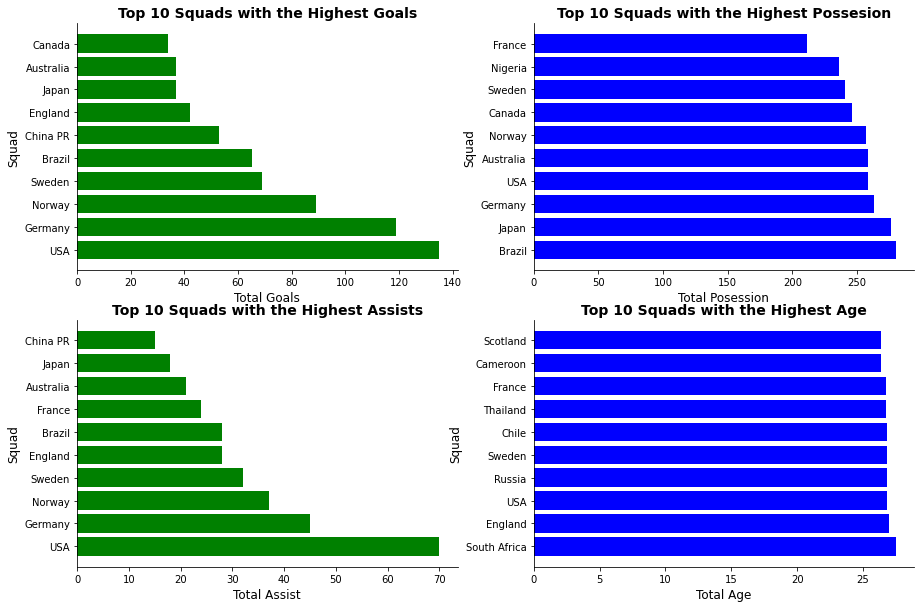

In [147]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# plot the data for Goals
ax[0, 0].barh(top_10_squads_by_goals.index, top_10_squads_by_goals.values, color='green')
ax[0, 0].set_title('Top 10 Squads with the Highest Goals', fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel('Total Goals', fontsize=12)
ax[0, 0].set_ylabel('Squad', fontsize=12)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)


##plot the data for Possession
ax[0, 1].barh(top_10_squads_by_possesion.index, top_10_squads_by_possesion.values, color='blue')
ax[0, 1].set_title('Top 10 Squads with the Highest Possesion', fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel('Total Posession', fontsize=12)
ax[0, 1].set_ylabel('Squad', fontsize=12)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)


##plot the data for Assists
ax[1, 0].barh(top_10_squads_by_assists.index, top_10_squads_by_assists.values, color='')
ax[1, 0].set_title('Top 10 Squads with the Highest Assists', fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel('Total Assist', fontsize=12)
ax[1, 0].set_ylabel('Squad', fontsize=12)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)


##plot the data for Age
ax[1, 1].barh(top_10_squads_by_age.index, top_10_squads_by_age.values, color='blue')
ax[1, 1].set_title('Top 10 Squads with the Highest Age', fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel('Total Age', fontsize=12)
ax[1, 1].set_ylabel('Squad', fontsize=12)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)


# show the plot
plt.show()

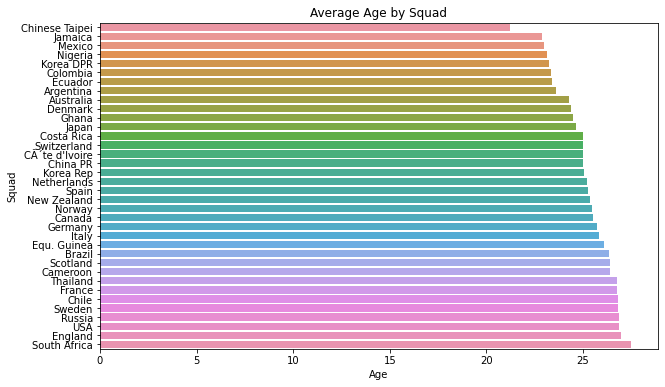

In [276]:
# Compute the mean age of each squad
age_by_squad = fifa.groupby('squad')['age'].mean()

# Sort the squads by average age
age_by_squad = age_by_squad.sort_values()

# Create a bar chart of the average age by squad
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=age_by_squad.values, y=age_by_squad.index, ax=ax)

# Set the title and axis labels
ax.set_title('Average Age by Squad')
ax.set_xlabel('Age')
ax.set_ylabel('Squad')

# Show the plot
plt.show()


Top 10 Countries with the Highest Matches Played

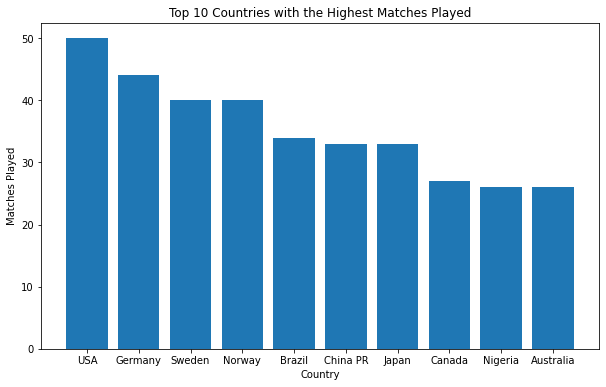

In [281]:
# Group the data by squad and calculate the total matches played
matches_played = fifa.groupby('squad').sum()['matches_played']

# Sort the values in descending order and get the top 10
top_10_matches_played = matches_played.sort_values(ascending=False)[:10]

# Create a bar plot for the top 10 matches played
plt.figure(figsize=(10,6))
plt.bar(top_10_matches_played.index, top_10_matches_played.values)
plt.title('Top 10 Countries with the Highest Matches Played')
plt.xlabel('Country')
plt.ylabel('Matches Played')
plt.show()

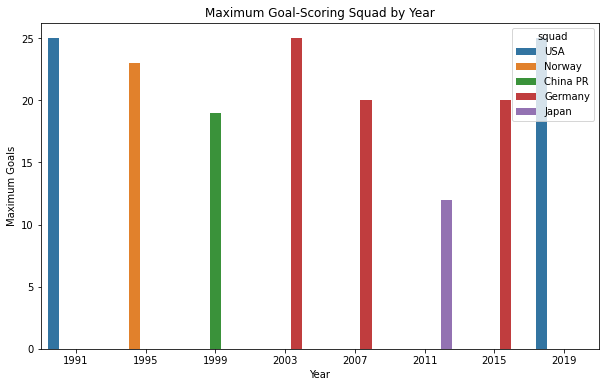

In [284]:
max_goal_squads = fifa.groupby('year')['squad', 'goals'].apply(lambda x: x.loc[x['goals'].idxmax()])

# Create a bar plot to visualize the maximum goal-scoring squad by year
plt.figure(figsize=(10, 6))
sns.barplot(x=max_goal_squads.index, y='goals', hue='squad', data=max_goal_squads)
plt.xlabel('Year')
plt.ylabel('Maximum Goals')
plt.title('Maximum Goal-Scoring Squad by Year')
plt.show()

# Compare squads based on their performance metrics

1. Relationship between assists and goals

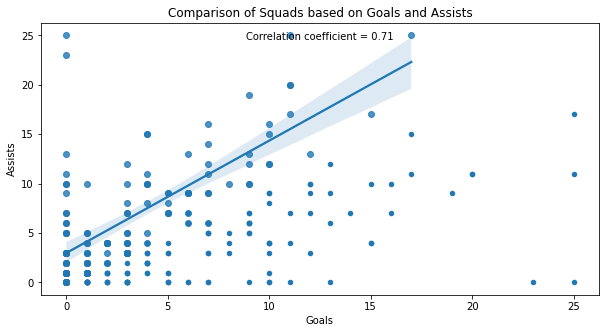

In [40]:
#calculate the correlation coefficient between assists and goals
corr_assist=fifa ['assists'].corr(fifa['goals'])
fifa.plot(kind='scatter', x='goals', y='assists', cmap='cool', figsize=(10,5))
plt.text(0.5, 0.95, f'Correlation coefficient = {corr_assist:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
sns.regplot(x='assists', y='goals', data=fifa)
plt.title('Comparison of Squads based on Goals and Assists')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.show()


 A correlation coefficient of 0.71 suggests that there is a strong positive relationship between assists and goal scored. The more assists the team gets, there greater their chances of scoring.
     

2. Relationship between goals and posession

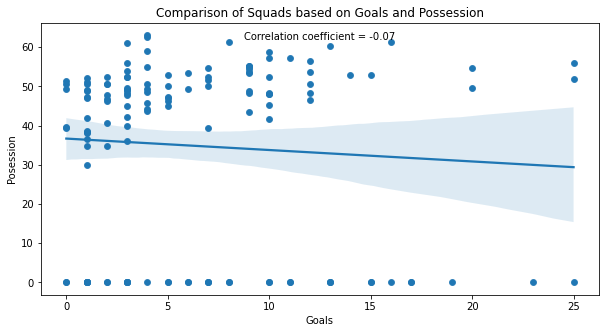

In [153]:
#calculate the correlation coefficient between possesion and goals
corr_possesion=fifa ['possesion'].corr(fifa['goals'])
fifa.plot(kind='scatter', x='goals', y='possesion', cmap='cool', figsize=(10,5))
plt.text(0.5, 0.95, f'Correlation coefficient = {corr_possesion:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
sns.regplot(x='goals', y='possesion', data=fifa)
plt.title('Comparison of Squads based on Goals and Possession')
plt.xlabel('Goals')
plt.ylabel('Posession')
plt.show()


 A correlation coefficient of -0.07 suggests that there is a weak negative relationship between posession and goal scored. This means that as possession increases, there is a tendency for goals to decrease, but the relationship is not strong.


3. Relationship between Age and Goals Scored

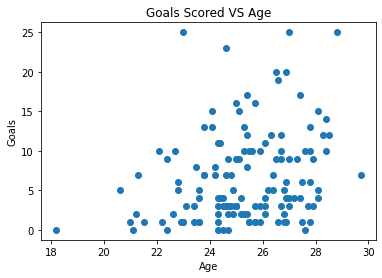

Correlation coefficient between age and goals: 0.2632310761845021


In [155]:
# Calculate the correlation coefficient between age and goals
plt.scatter(fifa['age'], fifa['goals'])
plt.title('Goals Scored VS Age')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()

corr = fifa['age'].corr(fifa['goals'])
print("Correlation coefficient between age and goals:", corr)

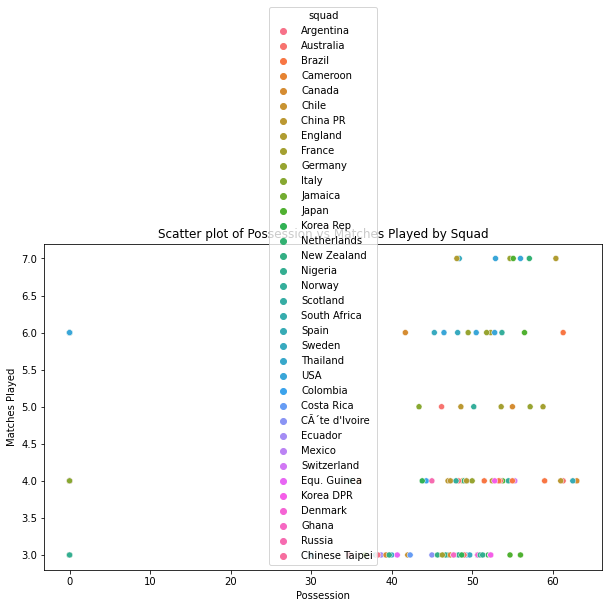

In [270]:
# Create a scatter plot comparing possession and matches played
plt.figure(figsize=(10, 6)) # set figure size
sns.scatterplot(x='possesion', y='matches_played', hue='squad', data=fifa)
plt.title('Scatter plot of Possession vs Matches Played by Squad')
plt.xlabel('Possession')
plt.ylabel('Matches Played')
plt.show()

# To Compare Countries based on their disciplinary records, using metrics such as the number of yellow cards and red cards recieved by each team.

                yellow_cards  red_cards
squad                                  
Nigeria                 12.0        2.0
Cameroon                12.0        0.0
Korea Rep                9.0        0.0
Brazil                   8.0        0.0
Colombia                 8.0        0.0
CÃ´te d'Ivoire           8.0        0.0
Thailand                 8.0        0.0
South Africa             7.0        1.0
China PR                 7.0        0.0
Ecuador                  6.0        1.0


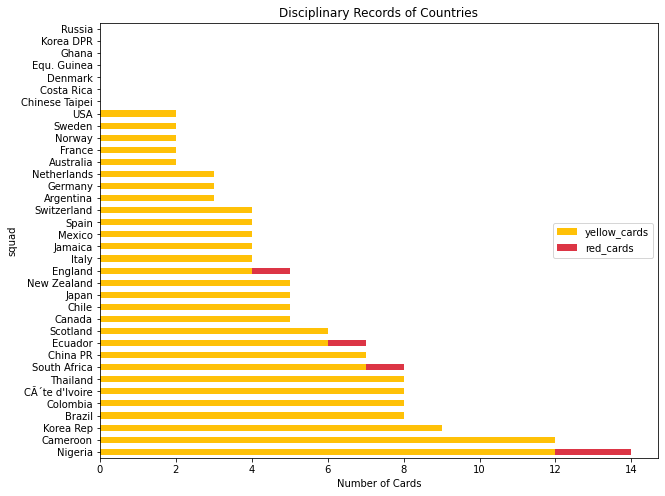

In [149]:
# Group the data by squad and calculate the total number of yellow and red cards
cards = fifa.groupby(['squad'])[['yellow_cards', 'red_cards']].sum()

# Sort the data by the total number of cards received
cards = cards.sort_values(['yellow_cards', 'red_cards'], ascending=False)
print(cards.head(10))


# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
cards.plot(kind='barh', stacked=True, color=['#FFC107', '#DC3545'], ax=ax)
ax.set_title('Disciplinary Records of Countries')
ax.set_xlabel('Number of Cards')
ax.legend(loc='center right')
plt.show()


Nigeria has the highest number of disciplinary records since the FIFA Female worldcup began, followed by Cameroon and Korea Rep

# Analyzing based on years

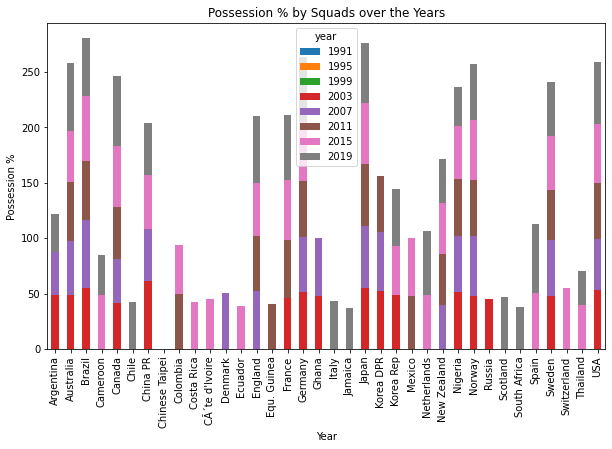

In [130]:
# Group the data by year and squad, and calculate the mean possession
possession_by_squad_year = fifa.groupby(['squad', 'year'])['possesion'].mean().unstack()

# Create a stacked bar chart
possession_by_squad_year.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Possession % by Squads over the Years')
plt.xlabel('Year')
plt.ylabel('Possession %')

# Show the chart
plt.show()


Total Goals by different Countries over the years

Text(0, 0.5, 'Goals')

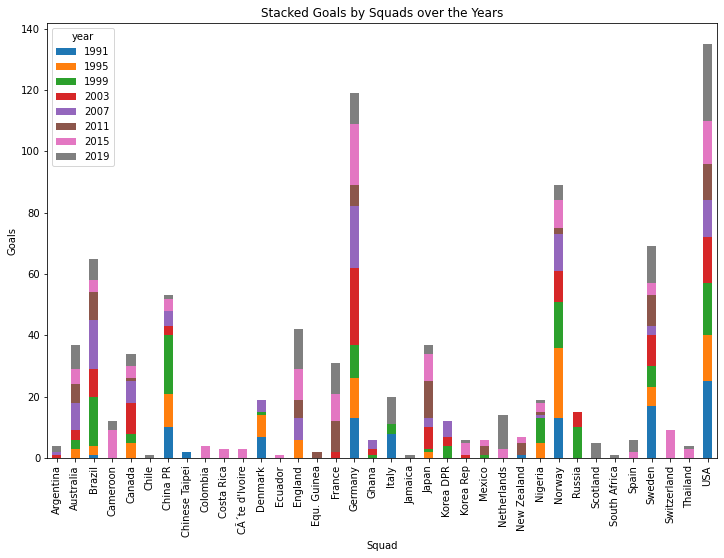

In [255]:
# Group the data by year and country, and sum the goals
goals_by_squad = fifa.groupby(['year', 'squad'])['goals'].sum().reset_index()

# Pivot the data to create a matrix with years as rows, countries as columns, and goals as values
goals_matrix = goals_by_squad.pivot(index='squad', columns='year', values='goals')

# Create a stacked bar plot
goals_matrix.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set the title and axis labels
plt.title('Stacked Goals by Squads over the Years')
plt.xlabel('Squad')
plt.ylabel('Goals')


In [ ]:
Total Assists by different Countries over the years

Text(0, 0.5, 'Assists')

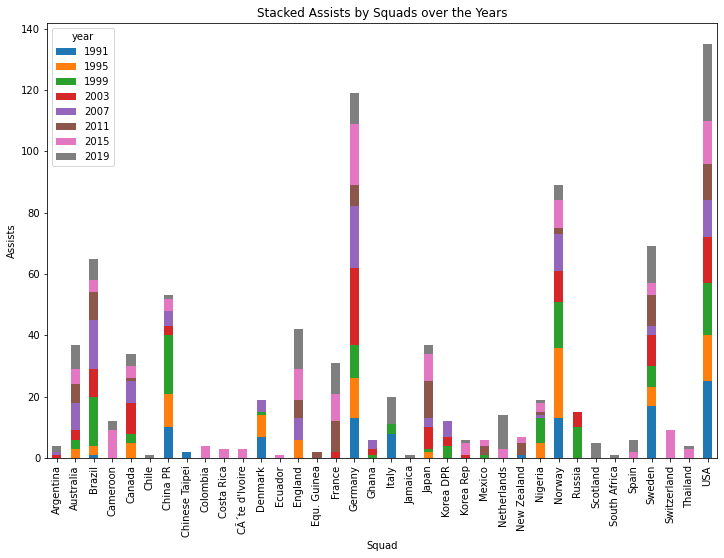

In [260]:
# Group the data by year and squad, and sum the assists
assists_by_squad = fifa.groupby(['year', 'squad'])['assists'].sum().reset_index()

# Pivot the data to create a matrix with years as rows, countries as columns, and goals as values
assists_matrix = assists_by_squad.pivot(index='squad', columns='year', values='assists')

# Create a stacked bar plot
goals_matrix.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set the title and axis labels
plt.title('Stacked Assists by Squads over the Years')
plt.xlabel('Squad')
plt.ylabel('Assists')


# Comparing Metrics to gain valuable insight


1.  Relationship between Possession and Yellow Cards

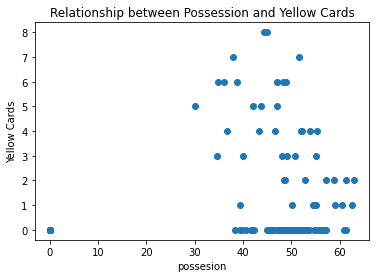

In [134]:
# extract possession and yellow cards columns
possesion = fifa['possesion']
yellow_cards = fifa['yellow_cards']

# create scatter plot
plt.scatter(possesion, yellow_cards)
plt.xlabel('possesion')
plt.ylabel('Yellow Cards')
plt.title('Relationship between Possession and Yellow Cards')
plt.show()

There is no relationship between posession and yellow card

2.  Comparing the two squads with the highest number of assists and goals

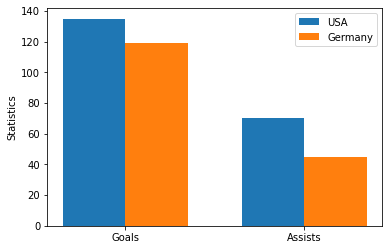

In [269]:
# Filter the data based on the squads you want to compare
squad1_data = fifa[fifa['squad'] == 'USA']
squad2_data = fifa[fifa['squad'] == 'Germany']

# Calculate the total goals and assists for each squad
squad1_goals = squad1_data['goals'].sum()
squad1_assists = squad1_data['assists'].sum()

squad2_goals = squad2_data['goals'].sum()
squad2_assists = squad2_data['assists'].sum()

# Create a bar chart to compare the goals and assists of the squads
labels = ['Goals', 'Assists']
squad1_stats = [squad1_goals, squad1_assists]
squad2_stats = [squad2_goals, squad2_assists]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, squad1_stats, width, label='USA')
rects2 = ax.bar(x + width/2, squad2_stats, width, label='Germany')

ax.set_ylabel('Statistics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

USA and Germany, has had the highest number of goals and assists over the years. 

# non-penalty goals vs penalty kicks made

In [180]:
grouped_squad= fifa.groupby('squad')['penalty_kicks_attempted', 'penalty_kicks_made', 'non_penalty_goals','goals'].sum().sort_values(by='goals', ascending=False).head(10)
grouped_squad


,penalty_kicks_attempted,penalty_kicks_made,non_penalty_goals,goals
squad,,,,
USA,9,8,127,135
Germany,6,6,113,119
Norway,4,4,85,89
Sweden,3,3,66,69
Brazil,6,5,60,65
China PR,2,2,51,53
England,9,6,36,42
Japan,3,3,34,37
Australia,1,0,37,37


By comparing these metrics, we can see which squad are more effective at converting penalty kicks and how their overall goal-scoring ability compares to other squads in the dataset.



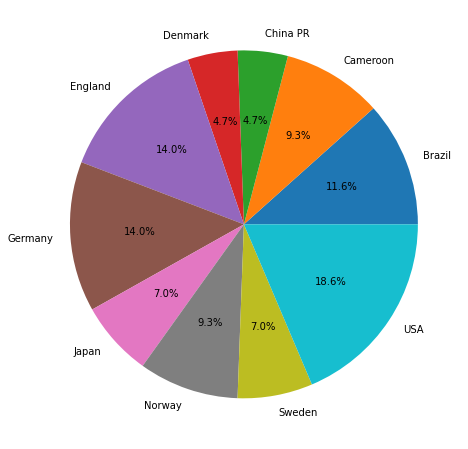

In [179]:
# Step 1: Filter the data to include only the top ten countries with the highest penalty kicks made
top_ten_countries = fifa.groupby('squad')['penalty_kicks_made'].sum().nlargest(10)

# Step 2: Create a new DataFrame with just the penalty kicks made data for the top ten countries
penalty_kicks_data = fifa[fifa['squad'].isin(top_ten_countries.index)][['squad', 'penalty_kicks_made']]

# Step 3: Create a pie chart of the penalty kicks made data
penalty_kicks_made= penalty_kicks_data.groupby('squad').sum().plot.pie(y='penalty_kicks_made',legend=False, autopct='%1.1f%%', figsize=(8, 8))
penalty_kicks_made.set_ylabel('')
plt.show()

The pie chart shows the top 10 countries with the highest penalty-kicks-made

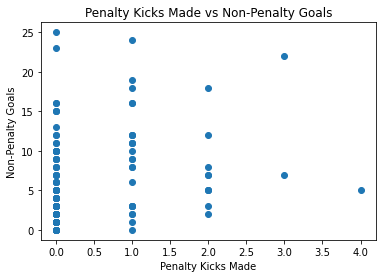

In [261]:
import matplotlib.pyplot as plt

plt.scatter(x=fifa['penalty_kicks_made'], y=fifa['non_penalty_goals'])
plt.xlabel('Penalty Kicks Made')
plt.ylabel('Non-Penalty Goals')
plt.title('Penalty Kicks Made vs Non-Penalty Goals')
plt.show()

# Performing Linear Regression to predict the outcome of the next FIFA Worldcup

In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Select the independent variables
X = fifa[['assists', 'matches_played', 'non_penalty_goals']]

# Select the dependent variable (target)
y = fifa['goals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

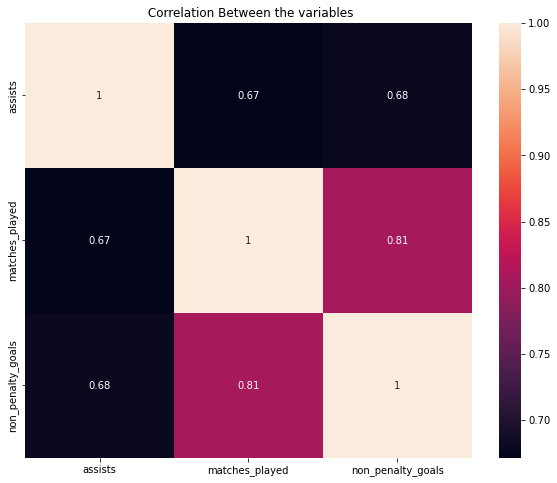

In [222]:
#computing correlation matrix for numeric columns 
corr_matrix =X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title(" Correlation Between the variables")
plt.show()

Creating a correlation matrix helps in identifying the strength and direction of the linear relationship between different variables in a dataset. It provides a matrix of correlation coefficients, where each element in the matrix represents the correlation between two variables. 

In [223]:
X_train

,assists,matches_played,non_penalty_goals
15,0,3,0
83,0,6,10
39,3,4,3
22,1,3,1
85,0,3,2
...,...,...,...
71,11,6,19
106,0,3,1
14,7,7,10
92,1,4,10


In [224]:
X_test

,assists,matches_played,non_penalty_goals
73,0,3,3
45,7,4,8
60,0,3,1
42,6,4,9
128,9,6,12
62,4,6,9
12,2,4,2
81,0,3,3
19,1,3,1
64,0,3,1


In [225]:
# Create a linear regression model and fit it to the training data
model= LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the testing data
print("Intercept:",model.intercept_)
print("Coefficient:", model.coef_)

Intercept: -0.9100869048457492
Coefficient: [0.07925668 0.35168134 0.93583196]


#let's compare our prediction with the y_test on a scatter plot

Text(0.5, 0, 'Actual values')

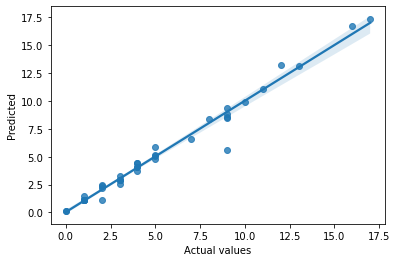

In [248]:
import seaborn as sns

prediction = model.predict(X_test)

sns.regplot(x=y_test, y=prediction)
plt.ylabel('Predicted')
plt.xlabel('Actual values')


The intercept (-0.9100) represents the predicted log-odds of scoring a goal when all the independent variables are zero.

The coefficient for 'assists' (0.0792) suggests that a one unit increase in 'assists' is associated with an increase of 0.0815 in the log-odds of scoring a goal, holding all other variables constant.

The coefficient for 'possession' (0.3516) suggests that a one unit increase in 'possession' is associated with an increase of 0.2750 in the log-odds of scoring a goal, holding all other variables constant.

The coefficient for 'matches_played' (0.9358) suggests that a one unit increase in 'matches_played' is associated with an increase of 0.9378 in the log-odds of scoring a goal, holding all other variables constant.

In summary, this logistic regression model suggests that 'assists', 'possession', and 'matches_played' are significant predictors of the likelihood of scoring a goal in the FIFA Women's dataset.


In [243]:
#Calculating the Error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

MAE= mean_absolute_error(y_test,prediction)
print("MAE:", MAE)

MSE = mean_squared_error(y_test, prediction)
print("MSE:", MSE)

r2s= r2_score(y_test,prediction)
print("R2 Score:", r2s)

MAE: 0.37091300121337056
MSE: 0.43784091634443534
R2 Score: 0.9763112140207597


In [238]:
MSE = mean_squared_error(y_test, prediction)
print("MSE:", MSE)

MSE: 0.43784091634443534


# SUMMARY

1. The FIFA Female worldcup has been played by 36 different countries for 8years.
2. Nigeria has the highest number of disciplinary records since the FIFA Female worldcup began with 2 red cards and 12 yellow cards, followed by Cameroon and Korea Rep
3. Countries with greater assists have high chances of scoring. USA and Germany has had the highest number of assists and goals over the years.
4. 

# Recommendation